In [7]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

In [8]:
# 讀取圖檔
img = cv2.imread('lena.bmp')
s = img.shape
print(s)

(512, 512, 3)


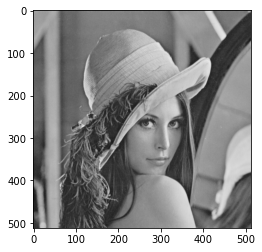

In [11]:
plt.imshow(img.astype('uint8'))
plt.show()

In [12]:
kernel = np.array([[0,255,255,255,0],[255,255,255,255,255],[255,255,255,255,255],[255,255,255,255,255],[0,255,255,255,0]])

In [16]:
def dilation(img,k): 
    img_pad = np.pad(array=img, pad_width=((3,3),(3,3),(0,0)), mode='constant', constant_values=0)
    img_tmp = np.zeros(img_pad.shape)
    for i in range(3,515): #3~514
        for j in range(3,515): #3~514
            a1 = max(img_pad[i-2,j-1:j+3,0])
            a2 = max(img_pad[i-1,j-2:j+3,0])
            a3 = max(img_pad[i,j-2:j+3,0])
            a4 = max(img_pad[i+1,j-2:j+3,0])
            a5 = max(img_pad[i+2,j-1:j+3,0])
            f  = max(img_pad[i,j:,0])
            f = 0
            img_tmp[i,j,0] = max(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,1] = max(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,2] = max(a1,a2,a3,a4,a5,f)
    return img_tmp[3:515,3:515]
            

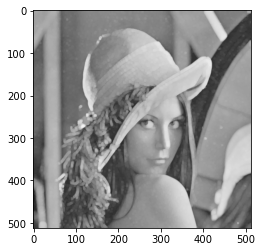

In [17]:
img_dil = dilation(img,kernel)
plt.imshow(img_dil.astype('uint8'))
plt.show()
#print(img_dil)

In [18]:
def erosion(img,k): 
    img_pad = np.pad(array=img, pad_width=((3,3),(3,3),(0,0)), mode='constant', constant_values=255)
    img_tmp = np.zeros(img_pad.shape)
    for i in range(3,515): #3~514
        for j in range(3,515): #3~514
            a1 = min(img_pad[i-2,j-1:j+3,0])
            a2 = min(img_pad[i-1,j-2:j+3,0])
            a3 = min(img_pad[i,j-2:j+3,0])
            a4 = min(img_pad[i+1,j-2:j+3,0])
            a5 = min(img_pad[i+2,j-1:j+3,0])
            f  = min(img_pad[i,j:,0])
            f = 255
            img_tmp[i,j,0] = min(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,1] = min(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,2] = min(a1,a2,a3,a4,a5,f)
    return img_tmp[3:515,3:515]

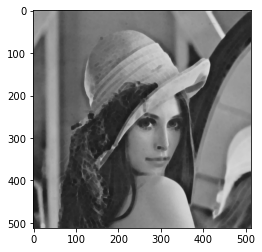

In [19]:
img_ero = erosion(img,kernel)
plt.imshow(img_ero.astype('uint8'))
plt.show()
#print(img_dil)

In [24]:
def opening(img,k):
    return dilation(erosion(img,k),k)
def closing(img,k):
    return erosion(dilation(img,k),k)

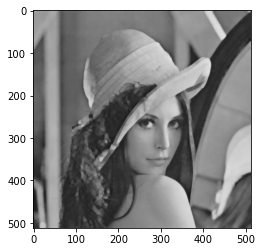

In [25]:
img_op = opening(img,kernel)
plt.imshow(img_op.astype('uint8'))
plt.show()

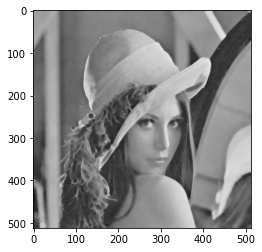

In [26]:
img_clo = closing(img,kernel)
plt.imshow(img_clo.astype('uint8'))
plt.show()

In [ ]:
def dilation(img,k): 
    img_pad = np.pad(array=img, pad_width=((3,3),(3,3),(0,0)), mode='constant', constant_values=0)
    img_tmp = np.zeros(img_pad.shape)
    for i in range(3,515): #3~514
        for j in range(3,515): #3~514
            a1 = max(img_pad[i-2,j-1:j+3,0])
            a2 = max(img_pad[i-1,j-2:j+3,0])
            a3 = max(img_pad[i,j-2:j+3,0])
            a4 = max(img_pad[i+1,j-2:j+3,0])
            a5 = max(img_pad[i+2,j-1:j+3,0])
            f  = max(img_pad[i,j:,0])
            f = 0
            img_tmp[i,j,0] = max(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,1] = max(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,2] = max(a1,a2,a3,a4,a5,f)
    return img_tmp[3:515,3:515]
def erosion(img,k): 
    img_pad = np.pad(array=img, pad_width=((3,3),(3,3),(0,0)), mode='constant', constant_values=255)
    img_tmp = np.zeros(img_pad.shape)
    for i in range(3,515): #3~514
        for j in range(3,515): #3~514
            a1 = min(img_pad[i-2,j-1:j+3,0])
            a2 = min(img_pad[i-1,j-2:j+3,0])
            a3 = min(img_pad[i,j-2:j+3,0])
            a4 = min(img_pad[i+1,j-2:j+3,0])
            a5 = min(img_pad[i+2,j-1:j+3,0])
            f  = min(img_pad[i,j:,0])
            f = 255
            img_tmp[i,j,0] = min(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,1] = min(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,2] = min(a1,a2,a3,a4,a5,f)
    return img_tmp[3:515,3:515]
def opening(img,k):
    return dilation(erosion(img,k),k)
def closing(img,k):
    return erosion(dilation(img,k),k)